In [72]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.neighbors import NearestNeighbors

In [73]:
file_path = './Bigdata/unscaled_data.xlsx'
df = pd.read_excel(file_path)

In [74]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('PATIENT_ID',axis=1,inplace=True)

In [75]:
binary_cols = df.columns[df.nunique() == 2].tolist()
numeric_cols = df.columns[df.nunique()!=2].tolist()
# 用KNN填充数据 k=5
imputer = KNNImputer(n_neighbors=5)  # 假设选择 5 个最近邻
df_complete_knn = imputer.fit_transform(df)

col = df.columns.tolist()
df = pd.DataFrame(df_complete_knn, columns=col)
for col in binary_cols:
    # 判断值不等于0或1的情况，然后按比例修改值
    df[col] = df[col].apply(lambda x: 1 if x > 0.3 else (0 if x < 0.3 else x))

In [76]:
## 修改因变量，并为1列
columns_to_drop = ['癌','癌前病变','良性疾病','健康或非结肠疾病']

# 根据条件创建新的列 'y'
df['y'] = df.apply(lambda row: 1 if row['癌'] == 1 or row['癌前病变'] == 1 else 0, axis=1)
df.drop(columns=columns_to_drop, inplace=True)


In [31]:
## Logistic
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


X = df.drop('y', axis=1) 
y = df["y"] 
logistic_regression = LogisticRegression(max_iter=100000)
cv_scores = cross_val_score(logistic_regression, X, y, cv=5, scoring='accuracy')

mean_accuracy = cv_scores.mean()
print("平均准确率:", mean_accuracy)


平均准确率: 0.7032994759427533


In [32]:
## 标准化
from sklearn.preprocessing import StandardScaler
columns_to_normalize = numeric_cols

scaler = StandardScaler()
df_scaled=df.copy()
df_scaled[columns_to_normalize] = scaler.fit_transform(df_scaled[columns_to_normalize])

Xs = df_scaled.drop("y", axis=1)  
ys = df_scaled["y"]  

logistic_regression_scaled = LogisticRegression(max_iter=100000)
cv_scores = cross_val_score(logistic_regression_scaled, Xs, ys, cv=5, scoring='accuracy')

mean_accuracy = cv_scores.mean()
print("平均准确率:", mean_accuracy)


平均准确率: 0.7034873399292272


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

# 假设 df_scaled 是你已经标准化的数据集，最后一列是目标变量
# 如果最后一列不是目标变量，请调整标签列的索引

Xs = df.drop("y", axis=1)  
ys = df["y"] 
# 创建 LinearSVC 模型
SVC = LinearSVC(max_iter=100000)
accuracy_scores = cross_val_score(SVC, Xs, ys, cv=5)

print("Mean Accuracy:", accuracy_scores.mean())


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean Accuracy: 0.6036270946446344


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
#the standard nonlinear Support Vector Classifier
from sklearn.svm import SVC

Xs = df.drop("y", axis=1)  
ys = df["y"] 

SVCr = SVC(kernel='rbf')


accuracy_scores = cross_val_score(SVCr, Xs, ys, cv=5)


print("Mean Accuracy:", accuracy_scores.mean())


Mean Accuracy: 0.6825971186943298


In [35]:
from sklearn.tree import DecisionTreeClassifier


Xs = df.drop("y", axis=1)  
ys = df["y"] 

DT = DecisionTreeClassifier()


accuracy_scores = cross_val_score(DT, Xs, ys, cv=5)

print("Mean Accuracy:", accuracy_scores.mean())


Mean Accuracy: 0.6310122368475095


In [36]:
from sklearn.ensemble import ExtraTreesClassifier


Xs = df.drop("y", axis=1)  
ys = df["y"] 

ETC = ExtraTreesClassifier()

accuracy_scores = cross_val_score(ETC, Xs, ys, cv=5)

print("Mean Accuracy:", accuracy_scores.mean())


Mean Accuracy: 0.7126541567976912


In [37]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

accuracy_scores = cross_val_score(RF, Xs,ys,cv=5)
print("Mean Accuracy:", accuracy_scores.mean())

Mean Accuracy: 0.7230238889313109


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
Xs = df.drop("y", axis=1)  
ys = df["y"] 

# 初始化朴素贝叶斯分类器
model = GaussianNB()

# 使用5折交叉验证计算准确率
accuracy_scores = cross_val_score(model, Xs, ys, cv=5)

# 输出5个准确率得分
print("Mean Accuracy:",accuracy_scores.mean())

Mean Accuracy: 0.6432223867816019


In [40]:
## Experiment Data of 3 trails
Logistic = [0.7033,0.7029,0.7033]
Logistic_scaled = [0.7040,0.7034,0.7035]
Linear_SVC = [0.5368,0.6053,0.603627]
NonLinear_SVC = [0.6826,0.6825,0.68259]
DecisionTree = [0.6382,0.6349,0.631012]
ExtraTree = [0.7085,0.7116,0.712654]
RandomForest = [0.7254,0.7213,0.7230238]
NaiveBayes = [0.6419,0.6419,0.64322]


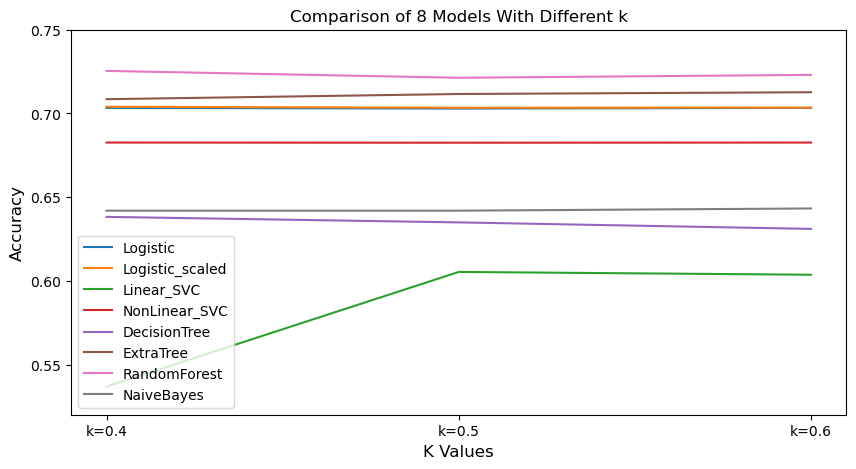

In [49]:
## Output model choosing process
import matplotlib.pyplot as plt
data_lists = [Logistic, Logistic_scaled,Linear_SVC,NonLinear_SVC,DecisionTree,ExtraTree, RandomForest,NaiveBayes]
label = ['Logistic','Logistic_scaled','Linear_SVC','NonLinear_SVC','DecisionTree','ExtraTree', 'RandomForest','NaiveBayes']
k_values = ["k=0.4", "k=0.5", "k=0.6"]
plt.figure(figsize=(10, 5))
for i, data_list in enumerate(data_lists):
    plt.plot(k_values, data_list, label=label[i])
plt.ylim(0.52, 0.75)
plt.xlabel('K Values', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.title('Comparison of 8 Models With Different k')
file_path = './Bigdata/figure/models.pdf'
plt.savefig(file_path, format='pdf', bbox_inches='tight')
plt.show()



In [52]:
## output order by importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
Xs = df.drop("y", axis=1)  
ys = df["y"] 
column_name = df.columns.tolist()
RF.fit(Xs,ys)
importance = RF.feature_importances_

importance_dict = {column_name[i]: importance[i] for i in range(len(column_name)-1)}
# 按照重要性分数从大到小对字典进行排序
sorted_importance = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))

selected_features = [feature for feature, imp in importance_dict.items() if imp > 0.005]

In [51]:
X_selected = df.drop("y", axis=1)[selected_features]
RF_sel = RandomForestClassifier()

accuracy_scores = cross_val_score(RF_sel, Xs,ys,cv=5)
print("Mean Accuracy:", accuracy_scores.mean())

Mean Accuracy: 0.7207320894413242


In [65]:
from sklearn.model_selection import GridSearchCV
param_test1 = {"n_estimators":range(291,400,10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(random_state=10),param_grid=param_test1,
                        scoring='accuracy',cv=5)
gsearch1.fit(Xs,ys)

print(gsearch1.best_params_)
print("best accuracy:%f" % gsearch1.best_score_)

{'n_estimators': 371}
best accuracy:0.726255


In [68]:
param_test2 = {"max_features":range(1,11,1)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=371,
                        random_state=10),
                        param_grid = param_test2,scoring='accuracy',cv=5)
gsearch1.fit(X,y)
print(gsearch1.best_params_)
print('best accuracy:%f' % gsearch1.best_score_)

{'max_features': 9}
best accuracy:0.730201


In [77]:
from sklearn.ensemble import RandomForestClassifier

columns_to_normalize = numeric_cols

scaler = StandardScaler()
df_scaled=df.copy()
df_scaled[columns_to_normalize] = scaler.fit_transform(df_scaled[columns_to_normalize])

Xs = df_scaled.drop("y", axis=1)  
ys = df_scaled["y"]

RF = RandomForestClassifier(n_estimators=371,max_features = 9,random_state=10)

accuracy_scores = cross_val_score(RF, Xs,ys,cv=5)
print("Mean Accuracy:", accuracy_scores.mean())

Mean Accuracy: 0.7268936471061819


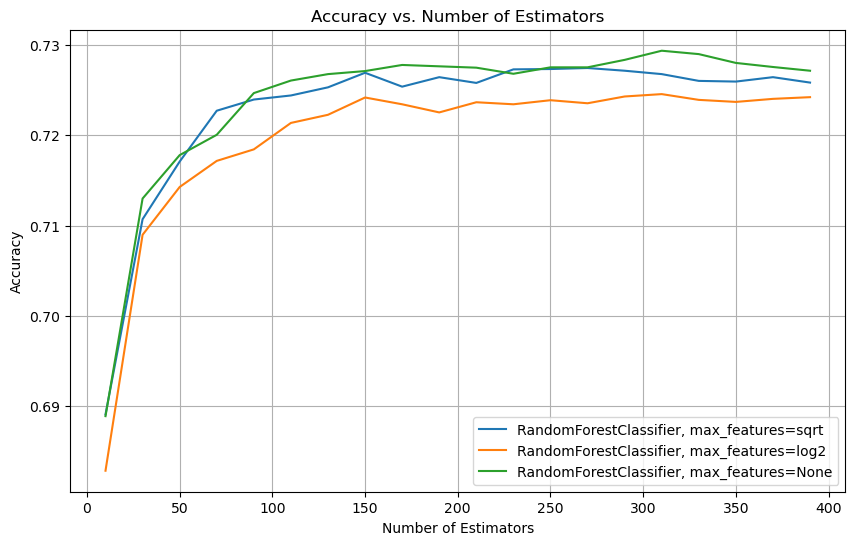

In [78]:

Xs = df.drop("y", axis=1)  
ys = df["y"] 

n_estimators_range = range(10, 401, 20)  # n_estimators从20到200，步长为20
max_features_options = ['sqrt', 'log2', None]  # max_features的选项

# 结果存储
results = {option: [] for option in max_features_options}

for max_features in max_features_options:
    for n_estimators in n_estimators_range:
        # 定义随机森林模型，n_jobs设置为-1以使用所有核心
        rf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, n_jobs=-1, random_state=42)
        # 进行交叉验证，n_jobs设置为-1以并行运算
        cv_scores = cross_val_score(rf, Xs, ys, cv=5, scoring='accuracy', n_jobs=-1)
        # 计算平均准确率并存储
        results[max_features].append(cv_scores.mean())


plt.figure(figsize=(10, 6))


for max_features, accuracies in results.items():
    plt.plot(n_estimators_range, accuracies, label=f'RandomForestClassifier, max_features={str(max_features)}')

plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()